# Handling User Input Mouse

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"    

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S01\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s01\env

d:\html_doc\program\opencv\packt\s01\env\lib\site-packages
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


In [2]:
#Let's import OpenCV module
import cv2

# The dir() function returns the list of 
# the names defined in OpenCV module
for i in dir(cv2):
    if 'EVENT_' in i:
        print(i, end=', ')

EVENT_FLAG_ALTKEY, EVENT_FLAG_CTRLKEY, EVENT_FLAG_LBUTTON, EVENT_FLAG_MBUTTON, EVENT_FLAG_RBUTTON, EVENT_FLAG_SHIFTKEY, EVENT_LBUTTONDBLCLK, EVENT_LBUTTONDOWN, EVENT_LBUTTONUP, EVENT_MBUTTONDBLCLK, EVENT_MBUTTONDOWN, EVENT_MBUTTONUP, EVENT_MOUSEHWHEEL, EVENT_MOUSEMOVE, EVENT_MOUSEWHEEL, EVENT_RBUTTONDBLCLK, EVENT_RBUTTONDOWN, EVENT_RBUTTONUP, 

### Reading the images from files

Image Loaded Successfully


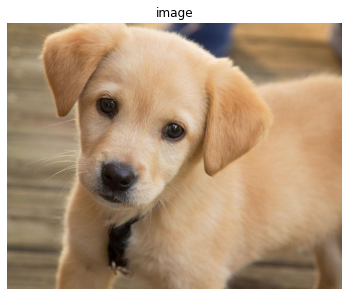

In [3]:
#Now we'll specify the path to our image
image_path = 'data/test.jpg'

#We'll use OpenCV's built-in function 'imread' to read the image
#Specify the image_path in the imread function
image = cv2.imread(image_path)

#If image is loaded successfully
#Go ahead and print the details
if image is not None:
    print('Image Loaded Successfully')
    
    plt.figure(figsize=(6,6))
    plt_view_image(plt,[["image",image[:,:,[2,1,0]] ]   ])

### Create a function to handle callback

In [4]:
image_setMouseCallback = np.copy(image)

# Next, we'll define a mouse callback function
# This function will be invoked if any mouse event
# has occured.

# In order to capture a particular event
# Such as Left Button Double click
# We'll use an If statement
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(image_setMouseCallback, (x,y), 10, (255,0,0), -1)
        print("x,y ==",x,y)

x,y == 12 8
x,y == 194 159
x,y == 316 203
x,y == 215 290
original image(507, 639, 3)
  Shape: (507, 639, 3)   Data type: uint8
[ [ 61 104 121] [ 64 107 124] [ 68 111 128] [ 71 114 131] [ 73 116 133] [ 73 116 133] [ 74 116 135] ]
[ [ 62 105 122] [ 65 108 125] [ 69 112 129] [ 72 115 132] [ 74 117 134] [ 74 117 134] [ 75 117 136] ]
[ [ 64 107 124] [ 67 110 127] [ 71 114 131] [ 74 117 134] [ 76 119 136] [ 76 119 136] [ 77 119 138] ]
[ [ 66 109 126] [ 69 112 129] [ 73 116 133] [ 76 119 136] [ 77 120 137] [ 78 121 138] [ 79 121 140] ]  image: uint8
image_setMouseCallback
  Shape: (507, 639, 3)   Data type: uint8
[ [ 61 104 121] [ 64 107 124] [ 68 111 128] [ 71 114 131] [ 73 116 133] [ 73 116 133] [255   0   0] ]
[ [ 62 105 122] [ 65 108 125] [ 69 112 129] [ 72 115 132] [ 74 117 134] [255   0   0] [255   0   0] ]
[ [ 64 107 124] [ 67 110 127] [ 71 114 131] [ 74 117 134] [255   0   0] [255   0   0] [255   0   0] ]
[ [ 66 109 126] [ 69 112 129] [ 73 116 133] [ 76 119 136] [255   0   0] [255   0

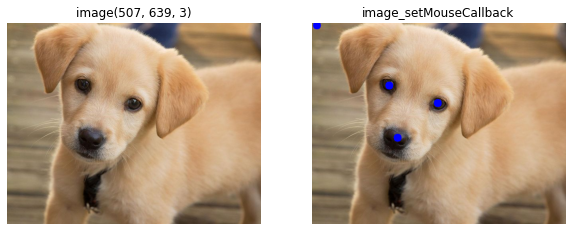

In [5]:
# Next, we'll create a namedWindow
cv2.namedWindow('image_setMouseCallback')

# we'll set a callback on that window
# First argument will be the name of window
# next will be the function name that we created
cv2.setMouseCallback('image_setMouseCallback', draw_circle)


#Now let's loop on the image until ESC key is pressed
#We're using the loop to reflect all the changes immediately
while(1):
    cv2.imshow('image_setMouseCallback', image_setMouseCallback)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

###########################################################
print_image('original image'+str(image.shape),'image',image,0,4,0,7)
print_image('image_setMouseCallback','image_setMouseCallback',image_setMouseCallback,0,4,0,7)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image"+str(image.shape),image[:,:,[2,1,0]] ],
                    ["image_setMouseCallback",image_setMouseCallback[:,:,[2,1,0]] ]
                   ])